In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df =pd.read_csv(r'D:\Disk C files\OneDrive\Desktop\data for projects\python project\Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replace blanks with 0 as tenure is 0 and no total charges are recorded

In [6]:
df['TotalCharges']=df['TotalCharges'].replace(' ','0')
df['TotalCharges']=df['TotalCharges'].astype('float')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Check Null Values

In [9]:
df.isnull().sum()
df.isnull().sum().sum()

np.int64(0)

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Check duplicate values

In [12]:
df.duplicated().sum()

np.int64(0)

# Check Duplicate based on Unique column

In [13]:
df['customerID'].duplicated().sum()

np.int64(0)

# Converted 0 and 1 value of seniorcitizen to yes/no to make it easier to understand

In [14]:
def conv(value):
    if value==1:
        return 'yes'
    else:
        return 'no'
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [16]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# How much customers churn out

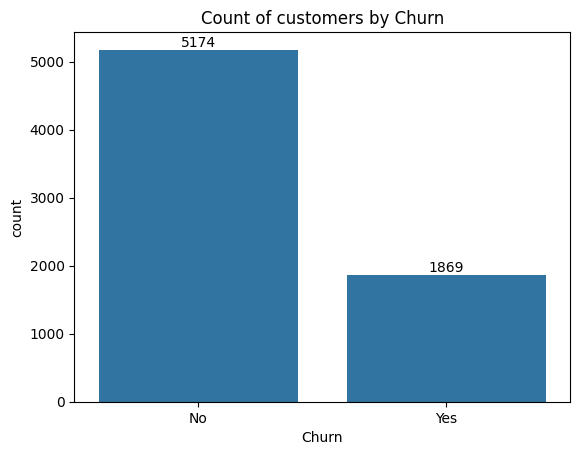

In [ ]:
ax=sns.countplot(x= 'Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Churn')
plt.show()


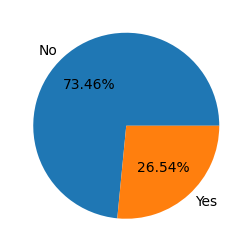

In [26]:
plt.figure(figsize=(3,4))
gb=df.groupby('Churn').agg({'Churn': 'count'})
gb
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%')
plt.title('Percentage of Churn Customers')
plt.show()

# From the givem pie chart we can conclude that 26.54% of our customers have churned out
# Now lets explore the reason behind it

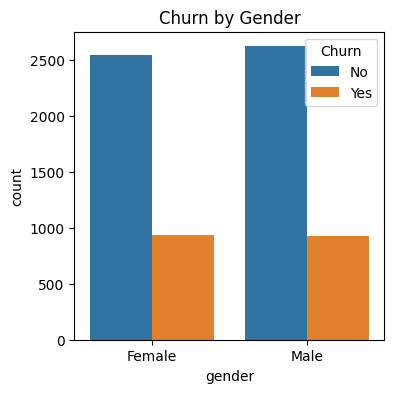

In [33]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender', data=df, hue='Churn')
plt.title('Churn by Gender')
plt.show()

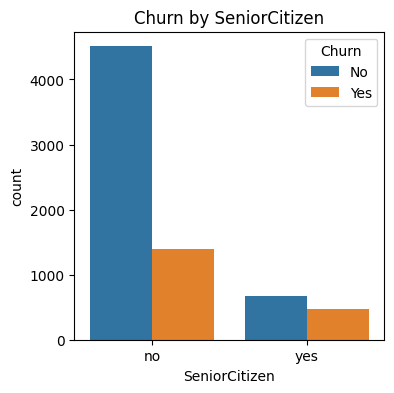

In [34]:
plt.figure(figsize=(4,4))
sns.countplot(x='SeniorCitizen', data=df, hue='Churn')
plt.title('Churn by SeniorCitizen')
plt.show()

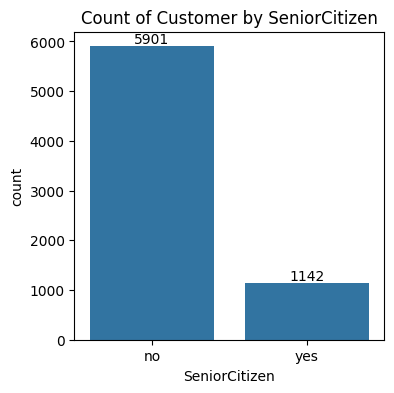

In [46]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x='SeniorCitizen', data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customer by SeniorCitizen')
plt.show()

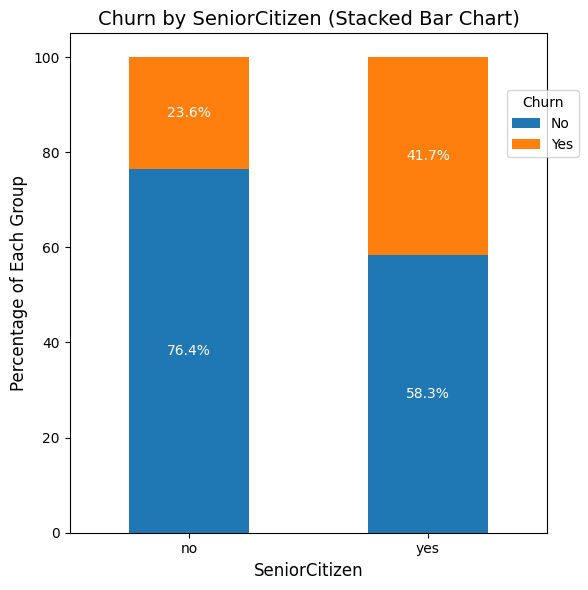

In [47]:


# Compute normalized counts for 'SeniorCitizen' and 'Churn'
counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot the stacked bar chart
ax = counts.plot(kind='bar', stacked=True, figsize=(6, 6), color=['#1f77b4', '#ff7f0e'])

# Add percentage labels to each segment
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    if height > 0:  # Avoid placing labels for zero-height bars
        color = "blue"  
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Add titles and labels
plt.title('Churn by SeniorCitizen (Stacked Bar Chart)', fontsize=14)
plt.xlabel('SeniorCitizen', fontsize=12)
plt.ylabel('Percentage of Each Group', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Churn',bbox_to_anchor=(0.9,0.9), fontsize=10)
plt.tight_layout()
plt.show()


# Comparative a greater percentage of people in senior citizen category have churned out

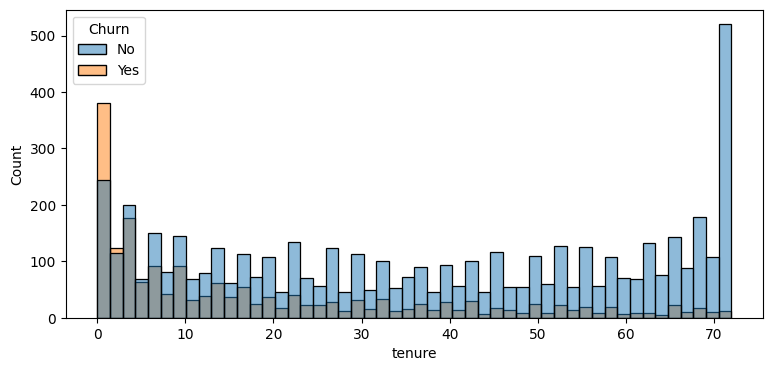

In [51]:
plt.figure(figsize=(9,4))
sns.histplot(x= 'tenure', data=df, bins=50, hue='Churn')
plt.show()

### People who have used our services for a long time have stayed and people who have used serives for 1 0r 2 months have churned

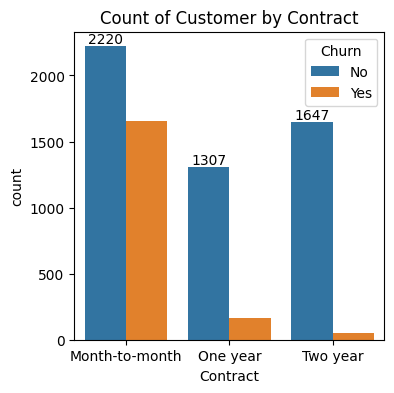

In [53]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x='Contract', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of Customer by Contract')
plt.show()

### People who have month-month contract are likely to churn than frm those who have 1 or 2 years of contract

In [54]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

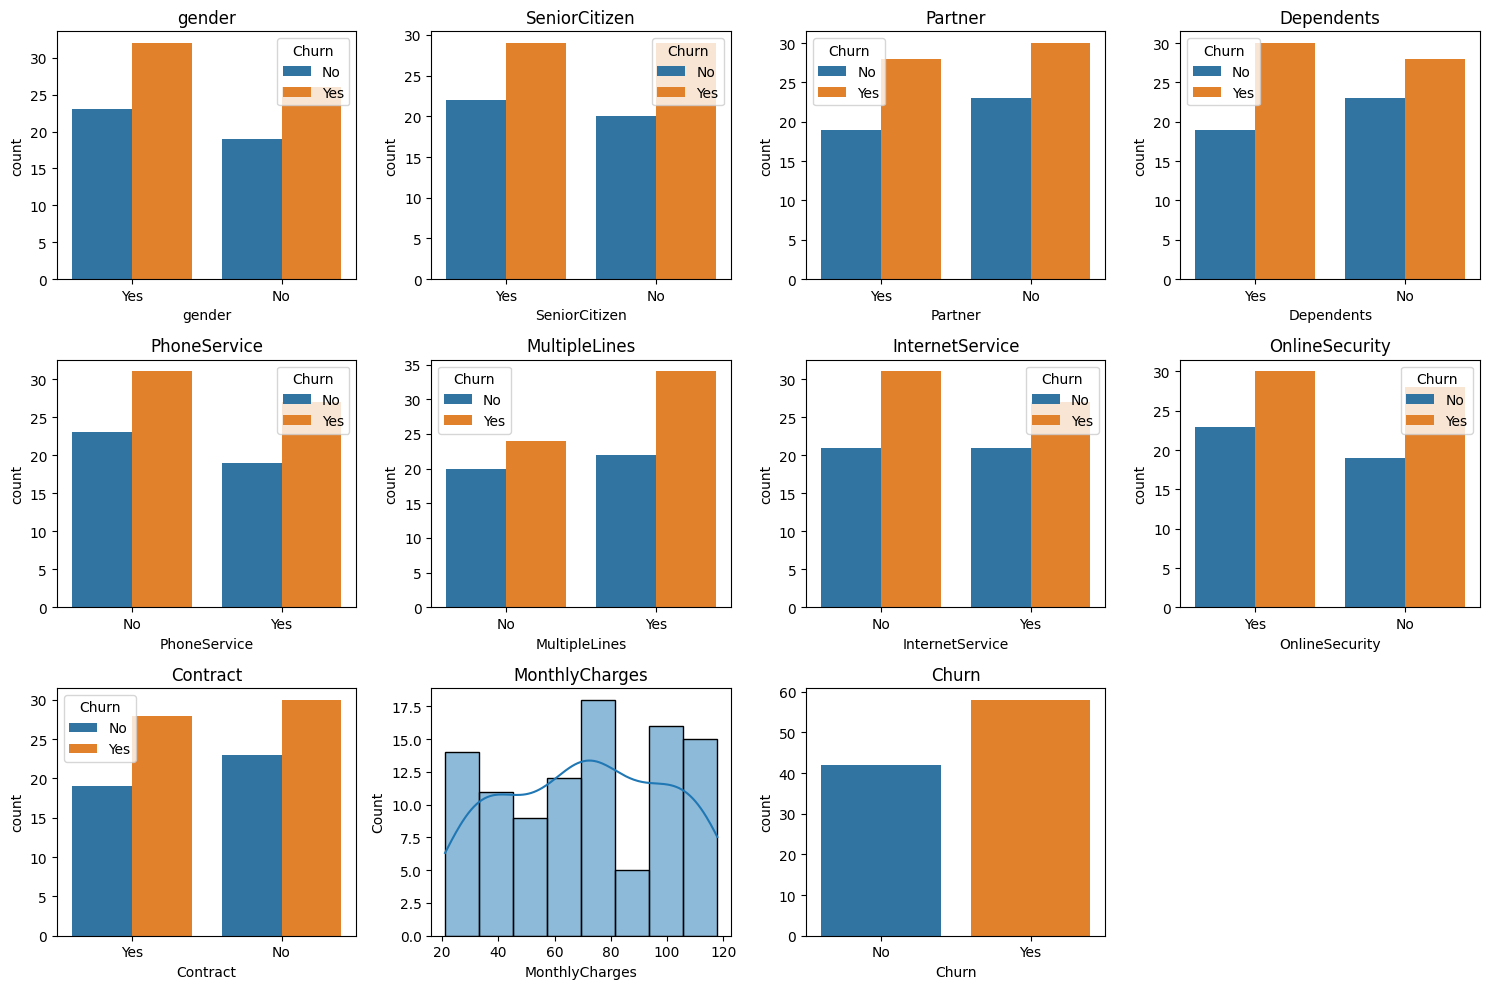

In [57]:

# Generate dummy data, including the 'Churn' column
data = {col: np.random.choice(['Yes', 'No'], 100) if col != 'MonthlyCharges' else np.random.uniform(20, 120, 100)
        for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'Contract', 'MonthlyCharges']}
data['Churn'] = np.random.choice(['Yes', 'No'], 100)  # Add 'Churn' column
df = pd.DataFrame(data)

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # Adjust grid size as needed
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if i < len(axes):
        if df[col].dtype == 'object':
            sns.countplot(data=df, x=col, ax=axes[i], hue='Churn')
        else:
            sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(col)

# Hide unused subplots
for ax in axes[len(df.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


### Customers are more likely to churn when they have month-to-month contracts, lack additional services like OnlineSecurity or TechSupport, and use Fiber optic internet, which may reflect dissatisfaction or cost concerns. Those without dependents or partners also show higher churn, possibly indicating less stability or commitment. Higher MonthlyCharges further contribute to churn, suggesting price sensitivity as a key factor. Overall, service quality, pricing, and contract flexibility drive churn behavior.

In [59]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'Contract',
       'MonthlyCharges', 'Churn'],
      dtype='object')

In [60]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,Contract,MonthlyCharges,Churn
0,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,29.880090,No
1,No,No,Yes,No,No,No,No,No,No,96.598426,Yes
2,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,87.034254,Yes
3,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,21.284701,Yes
4,Yes,No,No,No,No,Yes,Yes,No,No,116.242012,Yes


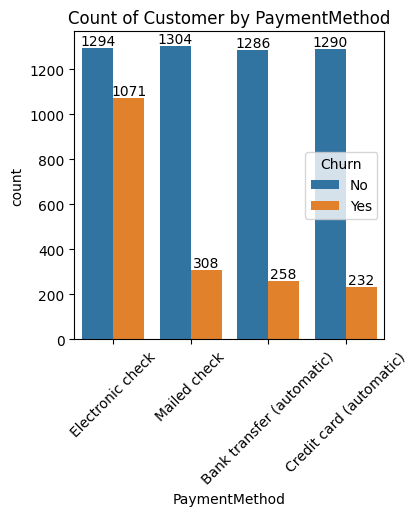

In [67]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x='PaymentMethod', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Customer by PaymentMethod')
plt.xticks(rotation=45)
plt.show()

### Customer is likely to churn when he is using electronic cheque as a payment method